In [33]:
#import standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [34]:
df_pitching = pd.read_csv('pitcher_features.csv')

In [35]:
df_pitching.head()

,Unnamed: 0,total_bf,age,years_after_28,primary_position,throws,sp_pct_,total_bf_,sp_pct,whip_reg,...,inplay_ratio_pitcher_reg,batter_avg_exp_ba_reg,babip_pitcher_reg,fly_balls_ratio_pitcher_reg,ground_balls_ratio_pitcher_reg,popups_ratio_pitcher_reg,hr_fb_pct_pitcher_reg,avg_bf_per_outing_reg,zone_chase_pct_reg,avg_fb_vel_reg
0,0,0.0,23.0,0.0,reliever,R,0.000000,56.250,2.883527,1.634001,...,0.173850,0.010844,0.329874,1.194588,1.344661,1.049938,0.207623,3.706988,0.616499,92.973393
1,1,218.0,29.0,1.0,reliever,L,0.000000,26.625,2.883527,1.148660,...,0.145077,0.021002,0.253228,1.305724,1.667525,0.254821,0.219309,2.875195,0.627072,93.001101
2,2,809.0,29.0,1.0,starter,L,100.000000,731.000,95.853353,1.254859,...,0.182966,0.039598,0.279968,3.804790,20.124974,1.082276,0.215285,13.940916,0.635585,87.752936
3,3,278.0,28.0,0.0,reliever,R,6.711409,241.750,2.883527,1.019444,...,0.174823,0.002692,0.262234,1.048302,1.085554,1.012396,0.095694,4.561512,0.630207,96.555288
4,4,282.0,28.0,0.0,reliever,R,0.000000,60.625,2.883527,2.342864,...,0.151033,0.010121,0.401590,1.181615,1.321683,1.046609,0.320766,4.755094,0.591293,95.522507


In [36]:
df_pitching.drop(columns=['Unnamed: 0','primary_position','sp_pct'], inplace=True)

In [37]:
#!pip install lazypredict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
X = df_pitching.drop(columns='total_bf')
y = df_pitching['total_bf']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Scale features
numeric_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [41]:
#convert categorical data
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [42]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Initialize the ElasticNetCV model (with 10-fold cross-validation)
elastic_net = ElasticNetCV(cv=10, random_state=42, alphas=np.logspace(-4, 4, 100), 
                           l1_ratio=0.5, max_iter=10000, tol=1e-4)

# Fit the ElasticNetCV model to the training data
elastic_net.fit(X_train, y_train)

# Get the best alpha and L1 ratio from cross-validation
best_alpha = elastic_net.alpha_
best_l1_ratio = elastic_net.l1_ratio_
print(f"Best alpha: {best_alpha}")
print(f"Best L1 ratio: {best_l1_ratio}")

# Predict the target on the test set
y_pred = elastic_net.predict(X_test)

# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)


# Ensure that the predicted values are non-negative (e.g., for a count variable like 'PA')
y_pred = np.maximum(y_pred, 0)

# Calculate the RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R² score (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Best alpha: 0.14174741629268062
Best L1 ratio: 0.5
Root Mean Squared Error (RMSE): 148.6969
R² Score: 0.4717


                           Feature  Coefficient  Abs_Coefficient
3                        total_bf_    96.949045        96.949045
2                          sp_pct_    45.765110        45.765110
0                              age   -20.049099        20.049099
16              zone_chase_pct_reg    14.901892        14.901892
9            batter_avg_exp_ba_reg   -13.954960        13.954960
17                  avg_fb_vel_reg    13.227641        13.227641
11     fly_balls_ratio_pitcher_reg   -13.111152        13.111152
8         inplay_ratio_pitcher_reg   -12.440310        12.440310
15           avg_bf_per_outing_reg    12.164508        12.164508
6               k_rate_pitcher_reg    10.189283        10.189283
7              bb_rate_pitcher_reg    -9.682430         9.682430
14           hr_fb_pct_pitcher_reg    -7.637678         7.637678
13        popups_ratio_pitcher_reg     7.100308         7.100308
5                          baa_reg    -6.675107         6.675107
1                   years

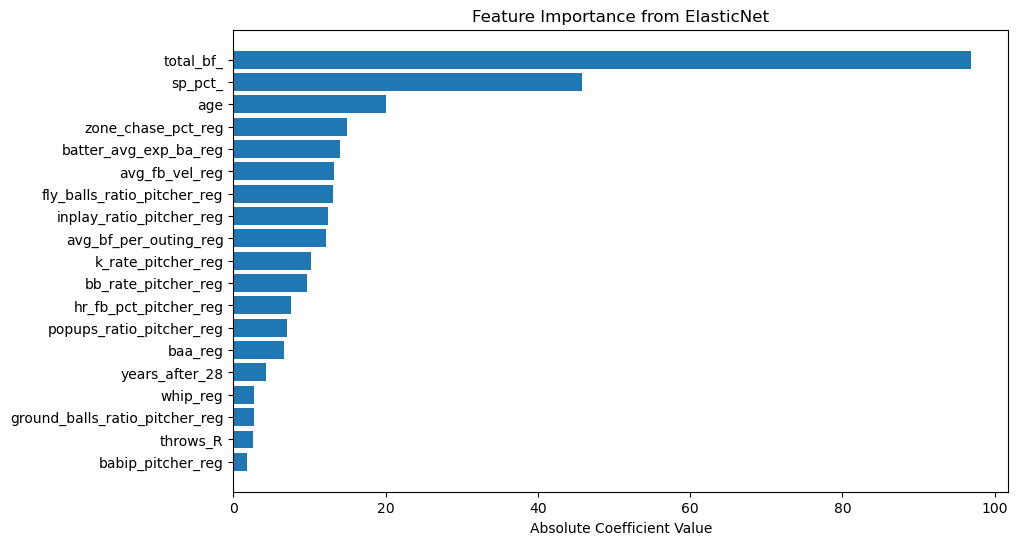

In [43]:
coefficients = elastic_net.coef_

# Create a DataFrame for the coefficients to associate with feature names
# After scaling, the feature names are lost, so we use the columns from X
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Use the original feature names from X
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficients
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Print the feature importance
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance from ElasticNet')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

In [44]:
print("\nActual vs Predicted Values:")
print(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head(20))  # Show first 20 rows


Actual vs Predicted Values:
     Actual   Predicted
711    23.0  153.623381
440   466.0  420.255567
525   160.0  116.952446
722    27.0   65.196746
39      0.0  158.193769
290   145.0  252.291483
300     0.0  141.347625
333   163.0    0.000000
208     0.0   56.918596
136    23.0    5.160651
137   116.0  513.542438
723     0.0    0.000000
486     0.0    4.995957
244   121.0  148.562306
344     0.0   27.370259
853    89.0  181.489492
572   273.0  179.957207
655   202.0  150.248062
891   258.0  213.271303
110     0.0    0.000000


In [45]:
df_pitching.loc[741]

total_bf                                0.0
age                                    27.0
years_after_28                          0.0
throws                                    R
sp_pct_                                 0.0
total_bf_                            24.375
whip_reg                           1.428132
baa_reg                            0.205876
k_rate_pitcher_reg                 0.168777
bb_rate_pitcher_reg                0.100286
inplay_ratio_pitcher_reg           0.170903
batter_avg_exp_ba_reg               0.02261
babip_pitcher_reg                  0.215482
fly_balls_ratio_pitcher_reg        1.405737
ground_balls_ratio_pitcher_reg     1.718654
popups_ratio_pitcher_reg           1.104127
hr_fb_pct_pitcher_reg              0.443554
avg_bf_per_outing_reg               4.26138
zone_chase_pct_reg                 0.584252
avg_fb_vel_reg                    94.739117
Name: 741, dtype: object